### Model Training 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/EPHx2_data_3class_pIC50_pubchem_fp.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


### Techniques Of Hyper Parameter Optimization applied to the model

1. GridSearchCV
2. Genetic Algorithm (TPOT Classifier)
3. Grey Wolf Optimization

### Manual Hyper Parameter tuning - Random Search CV

Parameters for hyperparameter tuning

In [3]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [4]:
X = df.drop('class', axis=1)
Y = df["class"]

In [5]:
X.shape

(2886, 881)

In [7]:
Y.shape

(2886,)

In [39]:
Y.value_counts()

class
active          2318
intermediate     309
inactive         259
Name: count, dtype: int64

### Feature Selection - removing low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [9]:
X.shape

(2886, 123)

__can see above that number of features reduced from 881 to 123 on removing the low variance features__

### Train test split (70:30 ratio)

In [12]:
# Perform data splitting using 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Randomized Search CV for hyperparameter tuning

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_sample

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [15]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [20]:
best_params = {
    'n_estimators': 600,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 780,
    'criterion': 'gini'
}



In [21]:
rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train,Y_train)
predictions=rf.predict(X_test)


### Accuracy on Test Dataset

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Accuracy",100*accuracy_score(Y_test,predictions))
print()
print("Confusion Matrix:\n",confusion_matrix(Y_test,predictions))
print()
print("Classification Report: \n\n",classification_report(Y_test,predictions))

Accuracy 85.56581986143186

Confusion Matrix:
 [[691   2  11]
 [ 34  32  11]
 [ 56  11  18]]

Classification Report: 

               precision    recall  f1-score   support

      active       0.88      0.98      0.93       704
    inactive       0.71      0.42      0.52        77
intermediate       0.45      0.21      0.29        85

    accuracy                           0.86       866
   macro avg       0.68      0.54      0.58       866
weighted avg       0.83      0.86      0.83       866



### Hyperparameter tuning using Genetic algorithm

__Genetic algorithm comes under the category of automated hyper parameter tuning algorithm__ 

It tries to apply natural selection mechanisms to Machine Learning contexts.

Let's imagine we create a population of N Machine Learning models with some predifined Hyperparameters. We can then calculate the accuracy of each model and decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In [31]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [33]:
! pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  DEPRECATION: stopit is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for stopit ... done
  DEPRECATION: deap is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running set

In [48]:
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 2, scoring = 'accuracy')
tpot_classifier.fit(X_train,Y_train_encoded)

                                                                            
Generation 1 - Current best internal CV score: 0.8376237623762376
                                                                            
Generation 2 - Current best internal CV score: 0.8376237623762376
                                                                            
Generation 3 - Current best internal CV score: 0.8376237623762376
                                                                            
Generation 4 - Current best internal CV score: 0.8376237623762376
                                                                            
Generation 5 - Current best internal CV score: 0.8376237623762376
                                                                            
Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                      890,
                                                                                      1000],
                                                                        'max_features': ['auto',
                                                                                         'sqrt',
                                                                                         'log2'],
                                                                        'min_samples_leaf': [1,
                                                                                             2,
                                                                                             4,
                                                                                             6,
                                                                                             8],
                                                                        'min_samples_split': [2,
                                                                                              5,
                                                                                              10,
                                                                                              14],
                                                                        'n_estimators': [200,
                                                                                         400,
                                                                                         600,
                                                                                         800,
                                                                                         1000,
                                                                                         1200,
                                                                                         1400,
                                                                                         1600,
                                                                                         1800,
                                                                                         2000]}},
               cv=2, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [49]:
accuracy = tpot_classifier.score(X_test, Y_test_encoded)
print("Accuracy obtained by Genetic algorithm: ",accuracy)

Accuracy obtained by Genetic algorithm:  0.848729792147806


### Hyperparameter Tuning using Grey Wolf Optimization

In [72]:
import random
import copy  # Add this line to import the copy module
import math

In [92]:
# Define the objective function (- loss function) for determining best hyperparameters using grey
#wolf optimization
def objective_function(params):
    if np.array_equal(params, np.zeros(len(params))):
        return 1
    n_estimators, max_features, max_depth = params
    # Ensure parameters are integers and within bounds
    n_estimators = max(10, int(n_estimators))
    max_features = max(1,int(max_features))
    max_depth = max(2, int(max_depth))  # Ensure max_depth is at least 1

    rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, random_state=42)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    return 1 - accuracy  # since GWO minimizes the function, we return 1 - accuracy

In [90]:
# Define the bounds for each hyperparameter in gwo
lower_bound = [10, 1, 2]  # min values for n_estimators, max_features, and max_depth
upper_bound = [800, X_train.shape[1], 20]  # max values for n_estimators, max_features, and max_depth

In [91]:
# Define parameters for GWO
num_particles = 50
max_iter = 10


In [82]:
# Define Wolf class
class Wolf:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for _ in range(dim)]
        for i in range(dim):
            self.position[i] = (maxx[i] - minx[i]) * self.rnd.random() + minx[i]  # Correctly initialize position within bounds
        self.fitness = fitness(self.position)

In [83]:
# Grey Wolf Optimization (GWO) algorithm
import random
def gwo(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
    population = [Wolf(fitness, dim, minx, maxx, i) for i in range(n)]
    population = sorted(population, key=lambda temp: temp.fitness)
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])
    Iter = 0
    while Iter < max_iter:
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % alpha_wolf.fitness)
        a = 2 * (1 - (Iter / max_iter))
        for i in range(n):
            A1, A2, A3 = a * (2 * rnd.random() - 1), a * (2 * rnd.random() - 1), a * (2 * rnd.random() - 1)
            C1, C2, C3 = 2 * rnd.random(), 2 * rnd.random(), 2 * rnd.random()
            X1, X2, X3, Xnew = [0.0 for _ in range(dim)], [0.0 for _ in range(dim)], [0.0 for _ in range(dim)], [0.0 for _ in range(dim)]
            for j in range(dim):
                X1[j] = alpha_wolf.position[j] - A1 * abs(C1 * alpha_wolf.position[j] - population[i].position[j])
                X2[j] = beta_wolf.position[j] - A2 * abs(C2 * beta_wolf.position[j] - population[i].position[j])
                X3[j] = gamma_wolf.position[j] - A3 * abs(C3 * gamma_wolf.position[j] - population[i].position[j])
                Xnew[j] += X1[j] + X2[j] + X3[j]
            for j in range(dim):
                Xnew[j] /= 3.0
            fnew = fitness(Xnew)
            if fnew < population[i].fitness:
                population[i].position = Xnew
                population[i].fitness = fnew
        population = sorted(population, key=lambda temp: temp.fitness)
        alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[:3])
        Iter += 1
    return alpha_wolf.position

In [93]:
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt

def initialization (PopulationSize,dimension,lowerBound,upperBound):
    SS_Boundary = len(lowerBound) if isinstance(upperBound,(list,np.ndarray)) else 1
    if SS_Boundary == 1:
        Positions = np.random.rand(PopulationSize,dimension)*(upperBound-lowerBound)+lowerBound
    else:
        Positions = np.zeros((PopulationSize,dimension))
        for i in range(dimension):
            Positions[:,i]=np.random.rand(PopulationSize)*(upperBound[i]-lowerBound[i])+lowerBound[i]
    return Positions

def GWO(PopulationSize,MaxIter,lowerBound,upperBound,dimension,objectiveFunction):
    Alpha_Pos = np.zeros(dimension)
    Alpha_Fit = np.inf
    Beta_Pos = np.zeros(dimension)
    Beta_Fit = np.inf
    Delta_Pos = np.zeros(dimension)
    Delta_Fit = np.inf

    Positions = initialization(PopulationSize,dimension,upperBound,lowerBound)
    Convergence_curve = np.zeros(MaxIter)

    itr= 0
    while itr<MaxIter:
        for i in range (Positions.shape[0]):
            boundary_UB = Positions[i,:]>upperBound
            boundary_LB = Positions[i,:]<lowerBound
            Positions[i,:] = (Positions[i,:]*(~(boundary_LB+boundary_UB)))+(upperBound*boundary_UB)+(lowerBound*boundary_LB)
            Fitness = objectiveFunction(Positions[i,:])

            if Fitness<Alpha_Fit:
                Alpha_Fit=Fitness
                Alpha_Pos=Positions[i,:]

            if Fitness>Alpha_Fit and Fitness<Beta_Fit:
                Beta_Fit=Fitness
                Beta_Pos=Positions[i,:]
            
            if Fitness>Alpha_Fit and Fitness>Beta_Fit and Fitness<Delta_Fit:
                Delta_Fit=Fitness
                Delta_Pos=Positions[i,:]
        
        a = 2.0-(itr*(2.0/MaxIter))  # Control Parameter
        for i in range (Positions.shape[0]):
            for j in range (Positions.shape[1]):
                r1=np.random.random()
                r2=np.random.random()

                A1 = (2*a*r1)-a
                C1 = 2 * r2

                D_Alpha = abs((C1*Alpha_Pos[j])-Positions[i,j])
                X1 = Alpha_Pos[j]-(A1*D_Alpha)
                
                r1=np.random.random()
                r2=np.random.random()

                A2 = (2*a*r1)-a
                C2=2*r2

                D_Beta = abs((C2*Beta_Pos[j])-Positions[i,j])
                X2 = Beta_Pos[j]-(A2*D_Beta)

                r1 = np.random.random()
                r2 = np.random.random()

                A3 = (2*a*r1)-a
                C3 = 2*r2

                D_Delta = abs((C3 * Delta_Pos[j]) - Positions[i,j])
                X3 = Delta_Pos[j] - A3 * D_Delta

                Positions[i,j] = (X1 + X2 + X3) / 3
        itr += 1
        Convergence_curve[itr - 1] = Alpha_Fit
    return Alpha_Fit, Alpha_Pos, Convergence_curve


In [95]:
! pip install messagebox


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Accuracy of Grey wolf optimization:  87.06697459584296

Best position:  [10.39520682 72.06428461  9.5248371 ]



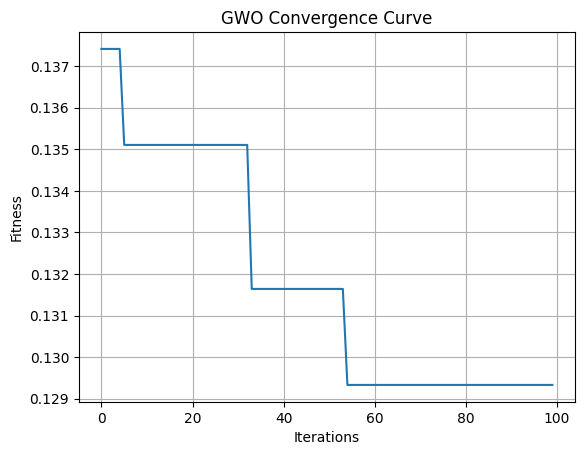

In [102]:
 #Define hyperparameter bounds and run GWO to find best hyperparameters

lower_bound = [10, 1, 2]  # min values for n_estimators, max_features, and max_depth
upper_bound = [200, X_train.shape[1], 20]  # max values for n_estimators, max_features, and max_depth

num_particles = 50
max_iter = 100

best_fit,best_position,convergence_curve = GWO(num_particles,max_iter,lower_bound,upper_bound,3,objective_function)

print("Accuracy of Grey wolf optimization: ",(1-best_fit)*100)
print()
print("Best position: ",best_position)
print()
root=tk.Tk()
root.withdraw()
# messagebox.showinfo("Grey Wolf Optimization result: ",f"Best Fitness {best_fit}\n Best Position {best_position}")

plt.plot(convergence_curve)
plt.xlabel("Iterations")
plt.ylabel("Fitness")

plt.title("GWO Convergence Curve")
plt.grid(True)
plt.show()


